In [40]:
#import the libraries
import pandas as pd
import numpy as np
from scipy import stats

In [41]:
# Load the CSV file
csv_file_path = ("property.csv")
df = pd.read_csv(csv_file_path)

In [42]:
df

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,...,2.0,2.0,652.0,NaN,1981.0,NaN,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,...,2.0,2.0,333.0,133.0,1995.0,NaN,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,...,2.0,4.0,436.0,NaN,1997.0,NaN,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,...,1.0,5.0,866.0,157.0,1920.0,NaN,-37.85908,144.89299,Western Metropolitan,6380.0


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13580 entries, 0 to 13579
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         13580 non-null  object 
 1   Address        13580 non-null  object 
 2   Rooms          13580 non-null  int64  
 3   Type           13580 non-null  object 
 4   Price          13580 non-null  float64
 5   Method         13580 non-null  object 
 6   SellerG        13580 non-null  object 
 7   Date           13580 non-null  object 
 8   Distance       13580 non-null  float64
 9   Postcode       13580 non-null  float64
 10  Bedroom2       13580 non-null  float64
 11  Bathroom       13580 non-null  float64
 12  Car            13518 non-null  float64
 13  Landsize       13580 non-null  float64
 14  BuildingArea   7130 non-null   float64
 15  YearBuilt      8205 non-null   float64
 16  CouncilArea    12211 non-null  object 
 17  Lattitude      13580 non-null  float64
 18  Longti

# ------------------------------------------------------------------------------------------

1. For the suburb Altona, it is postulated that a typical property sells for $800,000.

    Use the data at hand to test this assumption.

    Is the typical property price really $800,000 or has it increased?

    Use a significance level of 5%. 

In [44]:
#  fetching data for altona
altona_data = df[df['Suburb'] == 'Altona']

In [45]:
altona_data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
141,Altona,158 Queen St,3,h,520000.0,VB,Greg,3/09/2016,13.8,3018.0,...,2.0,1.0,352.0,242.0,2015.0,Hobsons Bay,-37.87000,144.82500,Western Metropolitan,5301.0
142,Altona,59 Bracken Gr,5,h,1525000.0,S,Greg,3/12/2016,13.8,3018.0,...,3.0,3.0,729.0,268.0,2005.0,Hobsons Bay,-37.87210,144.81050,Western Metropolitan,5301.0
143,Altona,1/123 Blyth St,2,t,720000.0,S,hockingstuart,4/02/2016,13.8,3018.0,...,1.0,2.0,292.0,125.0,2013.0,Hobsons Bay,-37.86870,144.81970,Western Metropolitan,5301.0
144,Altona,4 Blyth St,3,h,1120000.0,S,Barlow,4/03/2017,13.8,3018.0,...,1.0,2.0,506.0,120.0,1930.0,Hobsons Bay,-37.86930,144.83750,Western Metropolitan,5301.0
145,Altona,20 Linnet St,4,h,780000.0,PI,Sweeney,4/06/2016,13.8,3018.0,...,1.0,4.0,655.0,NaN,NaN,Hobsons Bay,-37.86800,144.81540,Western Metropolitan,5301.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12216,Altona,86 Grieve Pde,3,h,913000.0,S,Greg,3/09/2017,11.0,3018.0,...,2.0,3.0,530.0,148.0,1985.0,NaN,-37.86140,144.81931,Western Metropolitan,5301.0
12432,Altona,7/35 Grieve Pde,2,u,458000.0,SP,hockingstuart,9/09/2017,11.0,3018.0,...,1.0,1.0,63.0,75.0,1975.0,NaN,-37.86933,144.81704,Western Metropolitan,5301.0
12634,Altona,6 Myrtle Gr,3,h,1248500.0,S,RT,16/09/2017,11.0,3018.0,...,1.0,3.0,710.0,NaN,NaN,NaN,-37.87182,144.81600,Western Metropolitan,5301.0
13338,Altona,20 Burt St,3,h,920000.0,VB,PRD,26/08/2017,11.0,3018.0,...,2.0,2.0,584.0,NaN,NaN,NaN,-37.86249,144.82162,Western Metropolitan,5301.0


In [46]:
# Calculate sample mean and standard deviation
sample_mean = altona_data['Price'].mean()
sample_std = altona_data['Price'].std()

In [47]:
# Perform one-sample t-test
t_stat, p_value = stats.ttest_1samp(altona_data['Price'], 800000)
print(t_stat, p_value)

1.0277020770199676 0.3074832713055549


In [48]:
# Interpret the results
if p_value < 0.05:
    print("Reject the null hypothesis. The average price is significantly different from $800,000.")
else:
    print("Fail to reject the null hypothesis."+ 
          "There is not enough evidence to conclude that the average price is different from $800,000.")

Fail to reject the null hypothesis.There is not enough evidence to conclude that the average price is different from $800,000.


# ------------------------------------------------------------------------------------------

2. For the year 2016, is there any difference in prices of properties sold in the summer months vs winter months? 

    Consider months from October till March as winter months and the rest as summer months.

    Use a significance level of 5%. 

In [49]:
# Checking column information
# Checking the missing values
missing_values = df.isnull().sum()

# Get the data types
data_types = df.dtypes

# Count duplicates
duplicate_count = df.duplicated().sum()

# Create a summary DataFrame
summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Data Types': data_types,
    'Duplicate Count': [duplicate_count] * len(missing_values)
})

summary

,Missing Values,Data Types,Duplicate Count
Suburb,0,object,0
Address,0,object,0
Rooms,0,int64,0
Type,0,object,0
Price,0,float64,0
Method,0,object,0
SellerG,0,object,0
Date,0,object,0
Distance,0,float64,0
Postcode,0,float64,0


In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,13580.0,2.937997e+00,0.955748,1.00000,2.000000,3.000000,3.000000e+00,1.000000e+01
Price,13580.0,1.075684e+06,639310.724296,85000.00000,650000.000000,903000.000000,1.330000e+06,9.000000e+06
Distance,13580.0,1.013778e+01,5.868725,0.00000,6.100000,9.200000,1.300000e+01,4.810000e+01
Postcode,13580.0,3.105302e+03,90.676964,3000.00000,3044.000000,3084.000000,3.148000e+03,3.977000e+03
Bedroom2,13580.0,2.914728e+00,0.965921,0.00000,2.000000,3.000000,3.000000e+00,2.000000e+01
Bathroom,13580.0,1.534242e+00,0.691712,0.00000,1.000000,1.000000,2.000000e+00,8.000000e+00
Car,13518.0,1.610075e+00,0.962634,0.00000,1.000000,2.000000,2.000000e+00,1.000000e+01
Landsize,13580.0,5.584161e+02,3990.669241,0.00000,177.000000,440.000000,6.510000e+02,4.330140e+05
BuildingArea,7130.0,1.519676e+02,541.014538,0.00000,93.000000,126.000000,1.740000e+02,4.451500e+04
YearBuilt,8205.0,1.964684e+03,37.273762,1196.00000,1940.000000,1970.000000,1.999000e+03,2.018000e+03


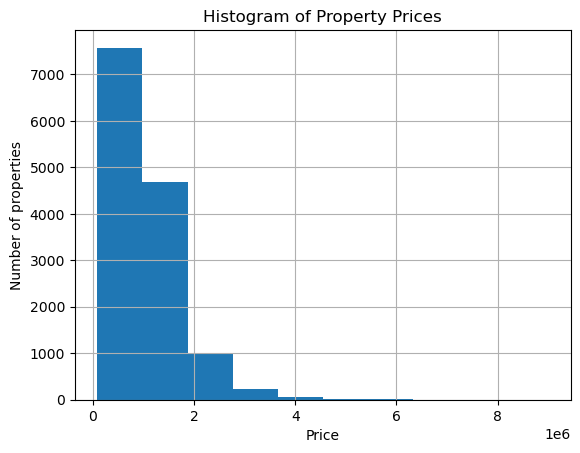

In [51]:
import matplotlib.pyplot as plt

# Create a histogram
plt.hist(df['Price'])
plt.xlabel('Price')
plt.ylabel('Number of properties')
plt.title('Histogram of Property Prices')
plt.grid(True)
plt.show()

Interpretation:

Distribution: The data is likely right-skewed, meaning there are a few very high-priced properties pulling the mean higher than the median. The median, which is less affected by outliers, gives a better representation of the "typical" price.

Range and Variability:  Prices range from a minimum of $85,000  to  a  maximum of  $9,000,000. 

                        The standard deviation indicates a significant spread in prices.

Quartiles:  
            50% of the properties are priced below $903,000.
            
            75% of the properties are priced below $1,330,000.

# -----------------------------------------------------------------------------------

2. For the year 2016, is there any difference in prices of properties sold in the summer months vs winter months? Consider months from October till March as winter months and the rest as summer months. Use a significance level of 5%. 

In [59]:
# Convert the 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Filter for properties sold in 2016
df_2016 = df[df['Date'].dt.year == 2016].copy()  # Ensure it's a copy, not a view

# Extract the month from the 'Date' column
df_2016['Month'] = df_2016['Date'].dt.month

# Create 'Season' column: Summer (April to September) vs Winter (October to March)
df_2016.loc[:, 'Season'] = df_2016['Month'].apply(lambda x: 'Summer' if x in [4, 5, 6, 7, 8, 9] else 'Winter')

# Check if the 'Season' column is created correctly
# print(df_2016[['Date', 'Month', 'Season']].head())

# Check for missing values in the 'Month' and 'Season' columns
# print(df_2016[['Month', 'Season']].isnull().sum())

# Group by Season and calculate mean price for each
summer_prices = df_2016[df_2016['Season'] == 'Summer']['Price']
winter_prices = df_2016[df_2016['Season'] == 'Winter']['Price']

# Perform a t-test to compare the means of the two groups (summer vs winter)
t_stat, p_value = stats.ttest_ind(summer_prices, winter_prices, nan_policy='omit')

# Check the results
alpha = 0.05  # significance level of 5%
if p_value < alpha:
    print(f"Reject the null hypothesis: There is a significant difference in property prices between summer and winter months.")
else:
    print(f"Fail to reject the null hypothesis: There is no significant difference in property prices between summer and winter months.")

# Output the t-statistic and p-value
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

Reject the null hypothesis: There is a significant difference in property prices between summer and winter months.
T-statistic: -4.043386317851058
P-value: 5.330976766763168e-05


# ------------------------------------------------------------------------------------

3. For the suburb of Abbotsford, what is the probability that out of 10 properties sold, 3 will not have car parking? Use the column car in the dataset. Round off your answer to 3 decimal places. 

To solve this problem, we can treat it as a binomial probability problem. We are looking for the probability that out of 10 properties sold in Abbotsford, 3 will not have car parking.

In [62]:
from scipy.stats import binom

# Step 1: Filter the data for Abbotsford
abbotsford_data = df[df['Suburb'] == 'Abbotsford']

# Step 2: Calculate the probability of no car parking
# A property has no car parking if the 'Car' column is NaN or 0
no_car_parking = abbotsford_data['Car'].isna() | (abbotsford_data['Car'] == 0)

# Probability of no car parking (p)
p_no_car = no_car_parking.mean()  # This is the proportion of properties with no car parking

# Step 3: Calculate the binomial probability for exactly 3 out of 10 properties having no car parking
n = 10  # Number of trials (properties sold)
k = 3   # Number of properties with no car parking
probability = binom.pmf(k, n, p_no_car)

# Step 4: Round the result to 3 decimal places
print(f"The probability that out of 10 properties sold, 3 will not have car parking is: {probability:.3f}")

The probability that out of 10 properties sold, 3 will not have car parking is: 0.260


# ---------------------------------------------------------------------------

4. In the suburb of Abbotsford, what are the chances of finding a property with 3 rooms? Round your answer to 3 decimal places. 

In [63]:
# Step 1: Filter the data for Abbotsford
abbotsford_data = df[df['Suburb'] == 'Abbotsford']

# Step 2: Calculate the probability of finding a property with 3 rooms
# Count the number of properties with 3 rooms
num_properties_with_3_rooms = (abbotsford_data['Rooms'] == 3).sum()

# Total number of properties in Abbotsford
total_properties_abbotsford = len(abbotsford_data)

# Probability of finding a property with 3 rooms
probability_3_rooms = num_properties_with_3_rooms / total_properties_abbotsford

# Step 3: Round the result to 3 decimal places
print(f"The probability of finding a property with 3 rooms in Abbotsford is: {probability_3_rooms:.3f}")

The probability of finding a property with 3 rooms in Abbotsford is: 0.357


# --------------------------------------------------------------------

5. In the suburb of Abbotsford, what are the chances of finding a property with 2 bathrooms? Round your answer to 3 decimal places.

In [64]:
# Step 1: Filter the data for Abbotsford
abbotsford_data = df[df['Suburb'] == 'Abbotsford']

# Step 2: Calculate the probability of finding a property with 2 bathrooms
# Count the number of properties with 2 bathrooms
num_properties_with_2_bathrooms = (abbotsford_data['Bathroom'] == 2).sum()

# Total number of properties in Abbotsford
total_properties_abbotsford = len(abbotsford_data)

# Probability of finding a property with 2 bathrooms
probability_2_bathrooms = num_properties_with_2_bathrooms / total_properties_abbotsford

# Step 3: Round the result to 3 decimal places
print(f"The probability of finding a property with 2 bathrooms in Abbotsford is: {probability_2_bathrooms:.3f}")

The probability of finding a property with 2 bathrooms in Abbotsford is: 0.339
